<a href="https://www.kaggle.com/code/tarizatique/google-stock-price?scriptVersionId=115164069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock/Google_Stock_Price_Test.csv
/kaggle/input/google-stock/Google_Stock_Price_Train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [3]:
training_set = pd.read_csv('/kaggle/input/google-stock/Google_Stock_Price_Train.csv')
training_set = training_set.iloc[ : ,1:2].values

In [4]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [5]:
#Gettiing input and ouput
X_train = training_set[0:1257]
y_train = training_set[1:1258]


In [6]:
#reshape
X_train = np.reshape(X_train, (1257,1,1))

In [7]:
regressor = Sequential()

regressor.add(LSTM( units= 4, activation = 'sigmoid', input_shape= (None, 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train,y_train , batch_size = 32 , epochs = 200)

2022-12-31 13:04:49.891668: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-31 13:04:50.143503: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
40/40 [==============================] - 2s 1ms/step - loss: 1.1634
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.9641
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.8003
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.6662
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.5553
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4638
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.3878
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.3245
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.2717
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.2278
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1618
Epoch 13/200
40/40 [=================

In [8]:
test_set = pd.read_csv('/kaggle/input/google-stock/Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[ : ,1:2].values

In [9]:
inputs = real_stock_price
inputs =  sc.transform(inputs)

In [10]:
inputs = np.reshape(inputs, (20,1,1))

predicted_stock_price = regressor.predict(inputs)

predicted_stock_price  = sc.inverse_transform(predicted_stock_price)

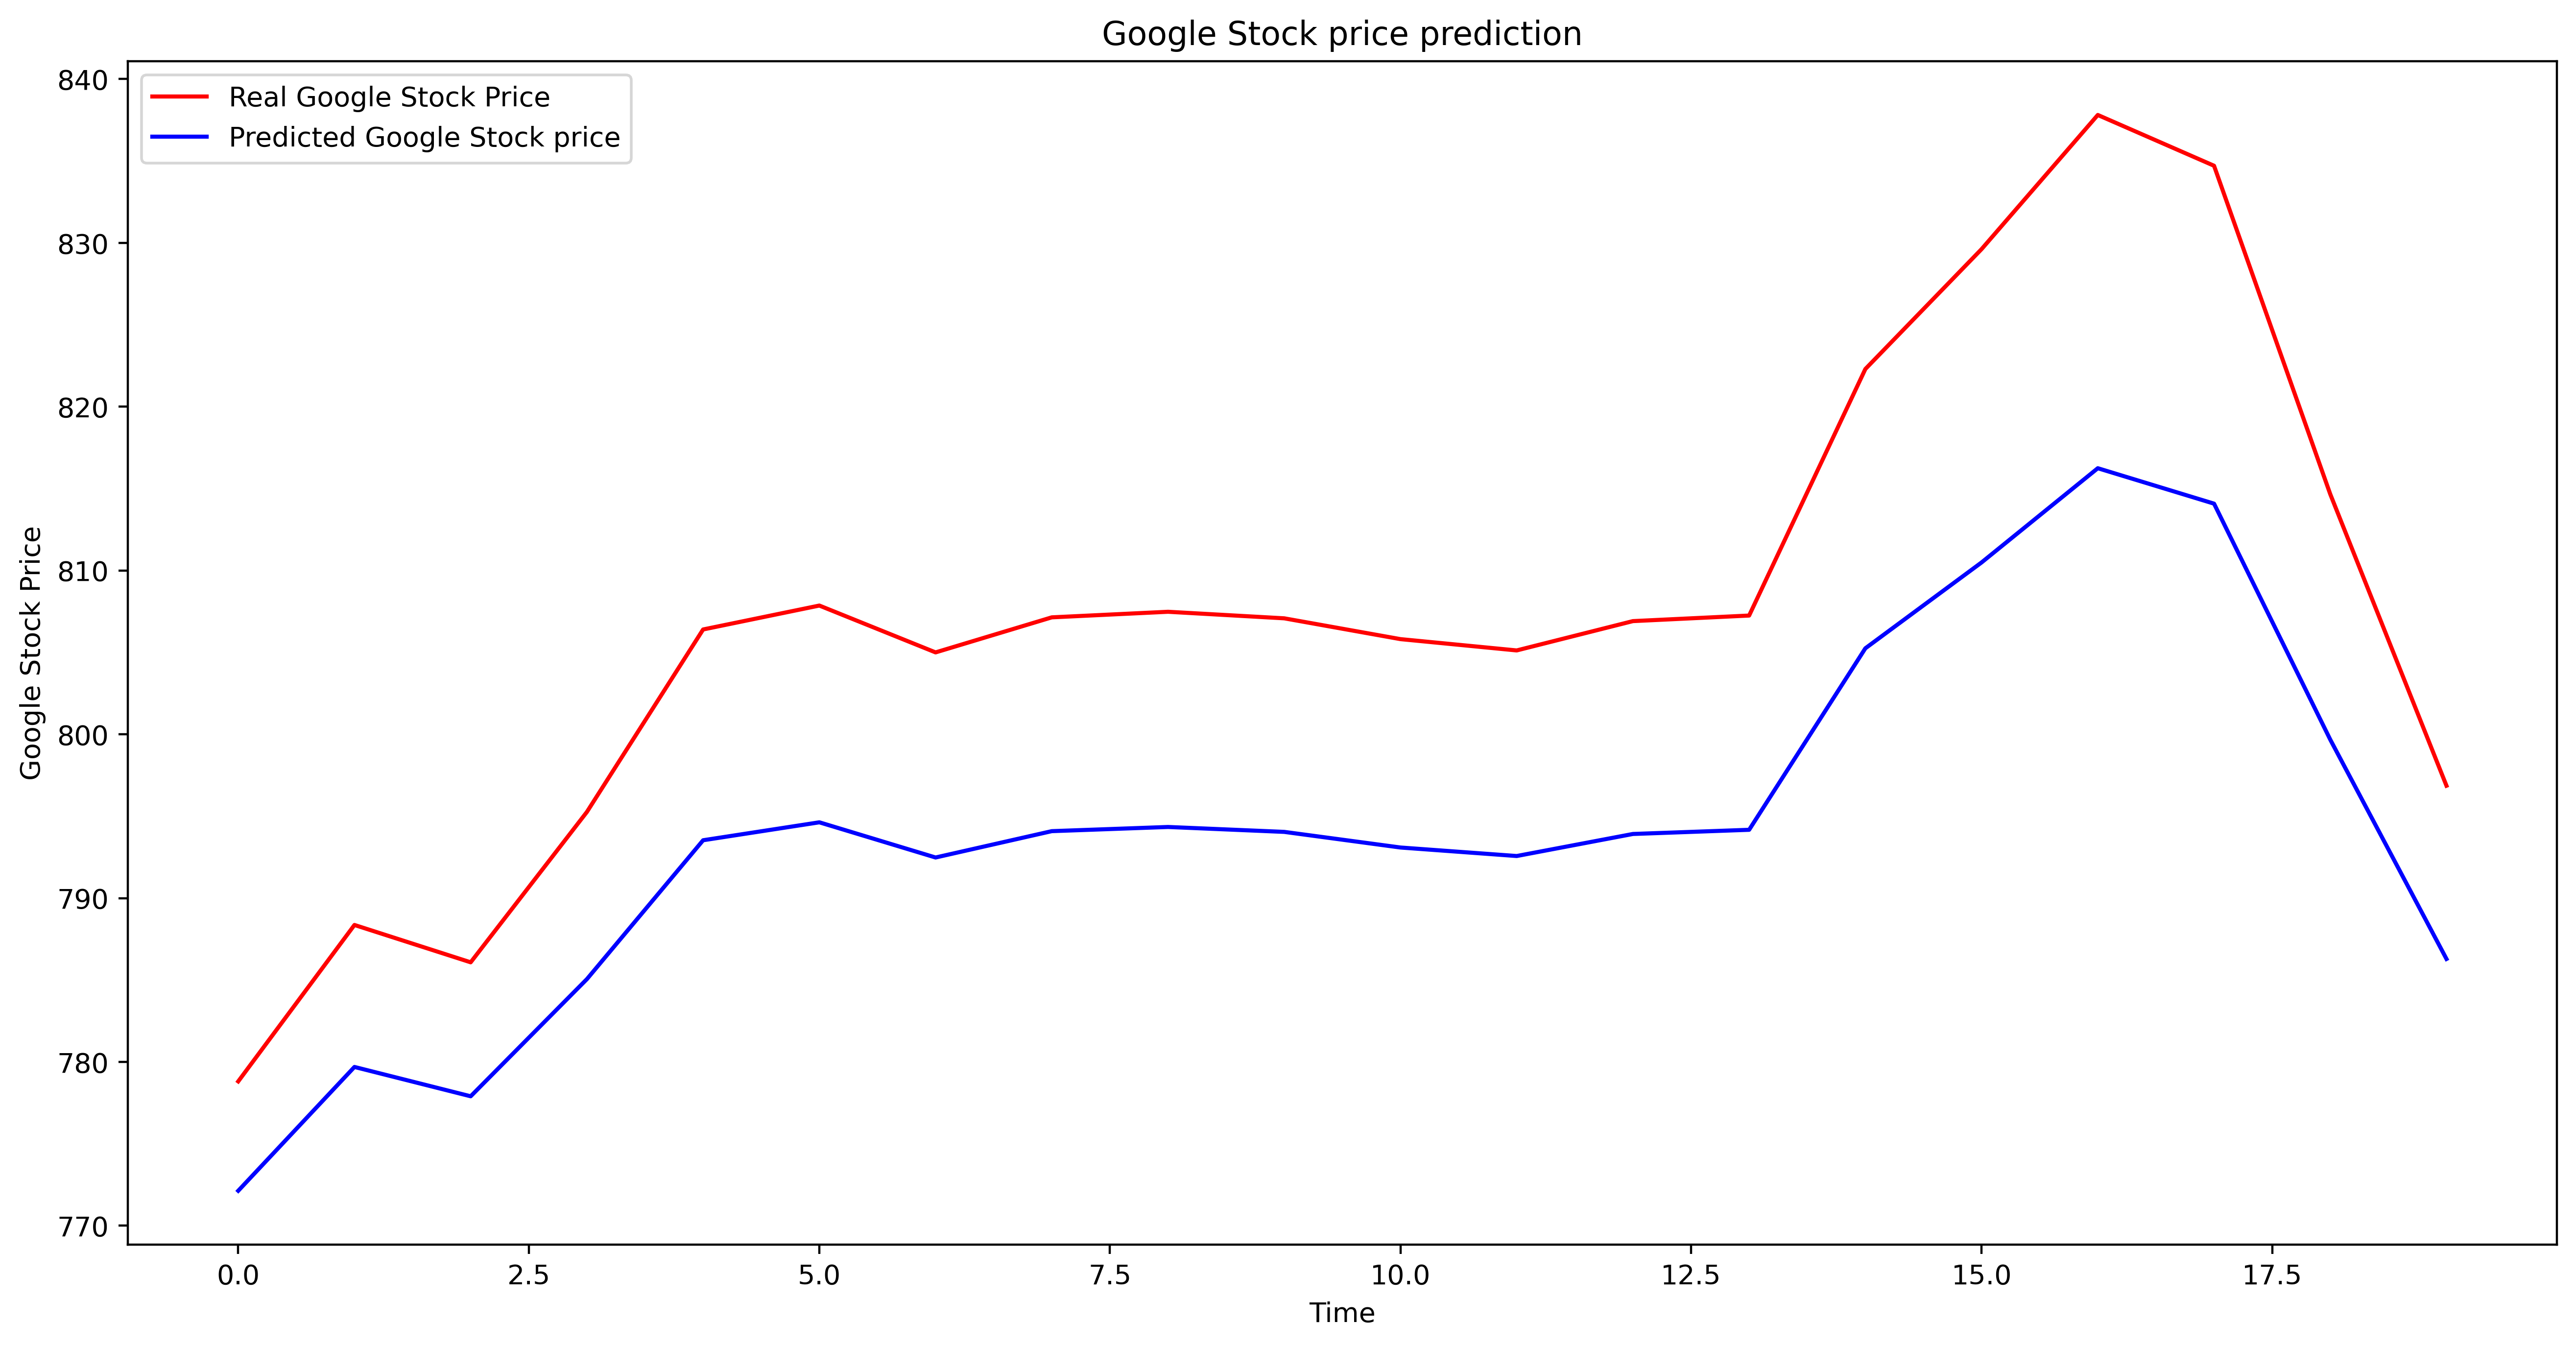

In [11]:
plt.figure(figsize=(16,8), dpi = 400)
plt.plot(real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted Google Stock price')
plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()